In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


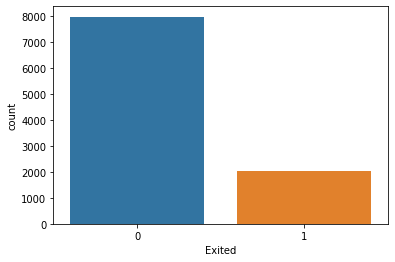

In [8]:
sns.countplot(df['Exited'])

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

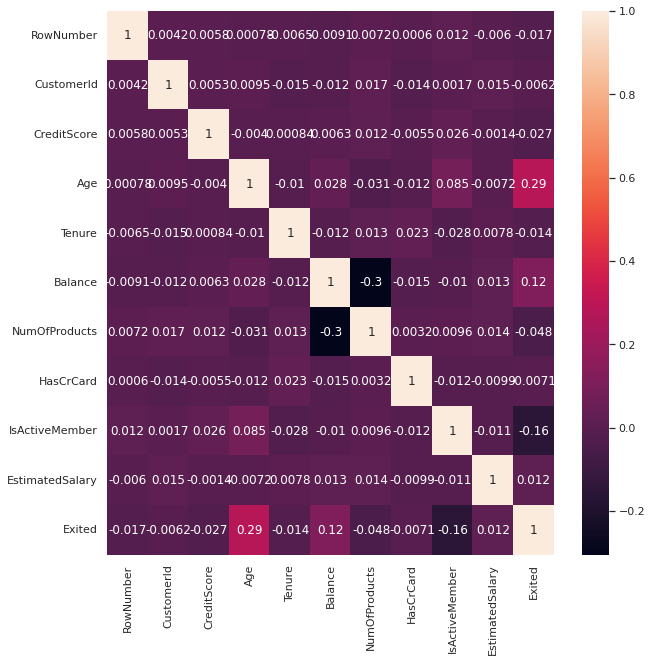

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


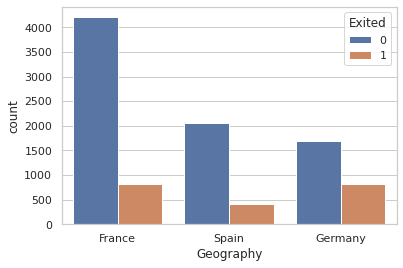

In [ ]:
sns.countplot(df.Geography,hue=df.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


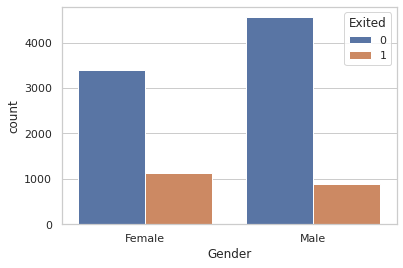

In [ ]:
sns.countplot(df.Gender,hue=df.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


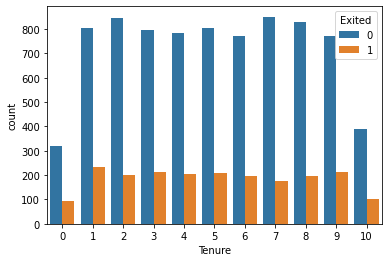

In [ ]:
sns.countplot(df.Tenure,hue=df.Exited)

In [ ]:
df.CreditScore.nunique()

460

In [ ]:
df.NumOfProducts.nunique()

4

In [ ]:
df.Surname.nunique()

2932

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


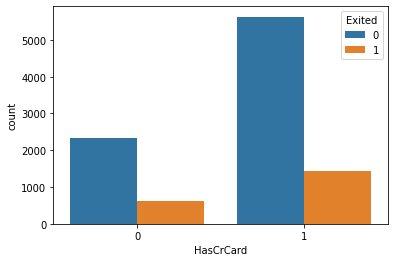

In [ ]:
sns.countplot(df.HasCrCard,hue=df.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


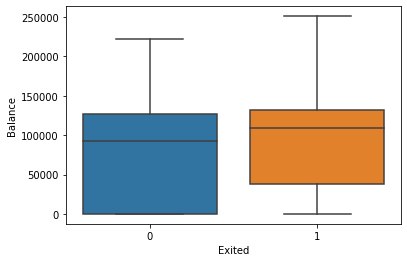

In [ ]:
sns.boxplot(df['Exited'],df['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


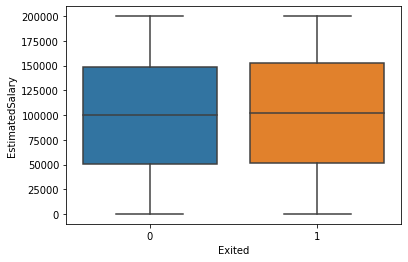

In [ ]:
sns.boxplot(df['Exited'],df['EstimatedSalary'])

Under Sampling

In [97]:
count_class_0,count_class_1 = df.Exited.value_counts()
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [98]:
df_class_0.shape

(7963, 14)

In [99]:
df_class_1.shape

(2037, 14)

In [100]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(4074, 14)

In [101]:
print('Random under-sampling')
print(df_test_under.Exited.value_counts())

Random under-sampling
1    2037
0    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


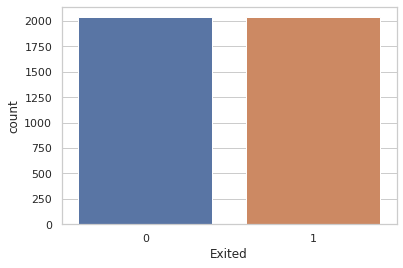

In [179]:
sns.countplot(df_test_under.Exited)

In [102]:
df_test_under.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4481,4482,15659234,Y?,494,France,Male,30,3,85704.95,1,0,1,27886.06,0
3589,3590,15785406,Watts,446,France,Female,51,4,105056.13,1,0,0,70613.52,0
2929,2930,15729054,Korovina,744,Germany,Male,32,4,96106.83,1,1,1,79812.77,0
1021,1022,15717164,Genovese,485,Spain,Male,32,6,102238.01,2,1,1,194010.12,0
4199,4200,15587596,Morrison,628,Spain,Female,39,8,107553.33,1,1,0,117523.41,0


In [103]:
a = pd.get_dummies(df_test_under['Gender'])

In [104]:
b = pd.get_dummies(df_test_under['Geography'])

In [105]:
df_test_under= pd.concat([a,b,df_test_under],axis=1,join='inner')

In [106]:
df_test_under.head()

,Female,Male,France,Germany,Spain,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4481,0,1,1,0,0,4482,15659234,Y?,494,France,Male,30,3,85704.95,1,0,1,27886.06,0
3589,1,0,1,0,0,3590,15785406,Watts,446,France,Female,51,4,105056.13,1,0,0,70613.52,0
2929,0,1,0,1,0,2930,15729054,Korovina,744,Germany,Male,32,4,96106.83,1,1,1,79812.77,0
1021,0,1,0,0,1,1022,15717164,Genovese,485,Spain,Male,32,6,102238.01,2,1,1,194010.12,0
4199,1,0,0,0,1,4200,15587596,Morrison,628,Spain,Female,39,8,107553.33,1,1,0,117523.41,0


In [107]:
df_test_under.drop(['Gender','RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [108]:
df_test_under.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4481,0,1,1,0,0,494,30,3,85704.95,1,0,1,27886.06,0
3589,1,0,1,0,0,446,51,4,105056.13,1,0,0,70613.52,0
2929,0,1,0,1,0,744,32,4,96106.83,1,1,1,79812.77,0
1021,0,1,0,0,1,485,32,6,102238.01,2,1,1,194010.12,0
4199,1,0,0,0,1,628,39,8,107553.33,1,1,0,117523.41,0


In [109]:
x = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

GradientBoostingClassifier()

In [114]:
print(rf.feature_importances_)

[0.01175609 0.01080193 0.0124007  0.02342059 0.01160071 0.13154911
 0.25945101 0.08472532 0.13702432 0.12005275 0.02010755 0.03912006
 0.13798986]


In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [116]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [117]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [118]:
scores

[0.7006134969325153,
 0.7202453987730061,
 0.7288343558282209,
 0.758282208588957,
 0.7447852760736197,
 0.7668711656441718,
 0.7092024539877301,
 0.701840490797546]

In [119]:
df1 = pd.DataFrame()
df1['Names'] = names
df1['Score'] = scores
df1

,Names,Score
0,Nearest Neighbors,0.700613
1,Linear SVM,0.720245
2,Gradient_Boosting,0.728834
3,Decision Tree,0.758282
4,Random Forest,0.744785
5,AdaBoost,0.766871
6,Naive Bayes,0.709202
7,Logistic_Regression,0.701840


In [120]:
cm = sns.light_palette('green',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.700613
1,Linear SVM,0.720245
2,Gradient_Boosting,0.728834
3,Decision Tree,0.758282
4,Random Forest,0.744785
5,AdaBoost,0.766871
6,Naive Bayes,0.709202
7,Logistic_Regression,0.701840


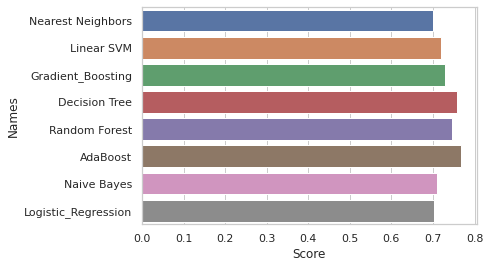

In [121]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df1)

In [124]:
classifier = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, random_state=1)

In [125]:
classifier.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [126]:
y_pred = classifier.predict(x_test)

In [129]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       408
           1       0.78      0.74      0.76       407

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



In [130]:
roc_auc_score(y_test,y_pred)

0.7668376933082816

In [131]:
fpr,tpr,threshold =roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)

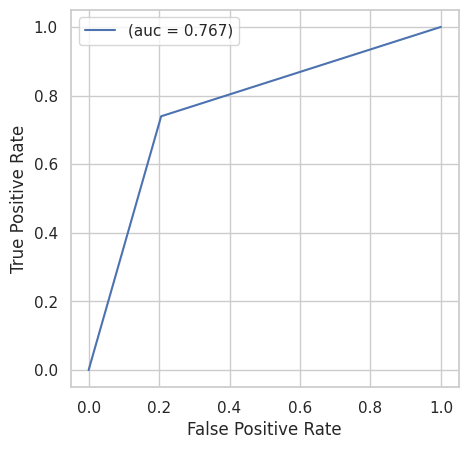

In [132]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Oversampling

In [133]:
count_class_0,count_class_1

(7963, 2037)

In [134]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
print("Random Over-Sampling")
print(df_test_over.Exited.value_counts())

Random Over-Sampling
1    7963
0    7963
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


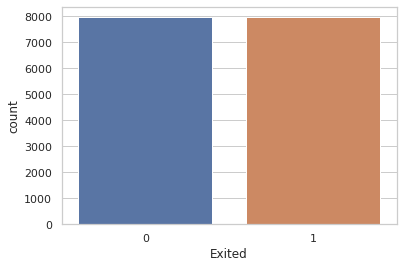

In [180]:
sns.countplot(df_test_over.Exited)

In [135]:
a1 = pd.get_dummies(df_test_over['Gender'])

In [136]:
b1 = pd.get_dummies(df_test_over['Geography'])

In [137]:
df_test_over= pd.concat([a1,b1,df_test_over],axis=1,join='inner')

In [138]:
df_test_over.drop(['Gender','RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [139]:
df_test_over.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1,0,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
3,1,0,1,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,1,0,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0
6,0,1,1,0,0,822,50,7,0.00,2,1,1,10062.80,0
8,0,1,1,0,0,501,44,4,142051.07,2,0,1,74940.50,0


In [140]:
x = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [144]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [145]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [146]:
scores

[0.8587570621468926,
 0.7112366603892027,
 0.7925298179535468,
 0.7645951035781544,
 0.7517263025737602,
 0.7752667922159447,
 0.7027620841180163,
 0.7065285624607659]

In [147]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,Nearest Neighbors,0.858757
1,Linear SVM,0.711237
2,Gradient_Boosting,0.792530
3,Decision Tree,0.764595
4,Random Forest,0.751726
5,AdaBoost,0.775267
6,Naive Bayes,0.702762
7,Logistic_Regression,0.706529


In [148]:
cm = sns.light_palette('green',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.858757
1,Linear SVM,0.711237
2,Gradient_Boosting,0.792530
3,Decision Tree,0.764595
4,Random Forest,0.751726
5,AdaBoost,0.775267
6,Naive Bayes,0.702762
7,Logistic_Regression,0.706529


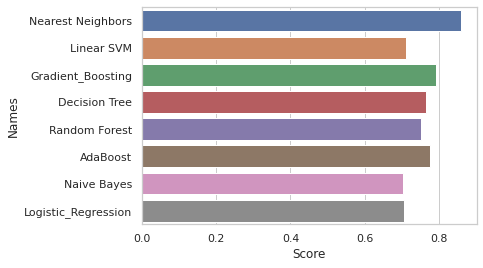

In [149]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df2)

In [150]:
classifier2 = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric = 'minkowski')

In [151]:
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [152]:
y_predicted = classifier2.predict(x_test)

In [153]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1593
           1       0.78      0.87      0.82      1593

    accuracy                           0.81      3186
   macro avg       0.82      0.81      0.81      3186
weighted avg       0.82      0.81      0.81      3186



In [154]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [155]:
roc_auc_score(y_test,y_predicted)

0.8113622096672944

In [156]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted)
auc = auc(fpr,tpr)

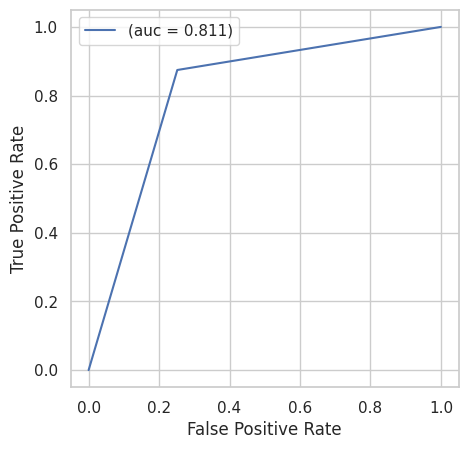

In [157]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()